# **Project Name**    - Rossman_Sales_Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


We have historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. **Predict the sales by store for future**



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
sheet_url = "https://docs.google.com/spreadsheets/d/19bcp7_pd93Xjvawetmrd6j6xf24lgJdGqMXAYm2pf0g/edit?usp=sharing"
csv_url = sheet_url.replace("/edit?usp=sharing", "/export?format=csv")

In [ ]:
ind_store = pd.read_csv(csv_url)
ind_store.head()

In [ ]:
csv_url_2 = "https://docs.google.com/spreadsheets/d/1EGGhpUbxKC-kFYEptWMoDJ-Jemhh8Vq9djSKdgdVQ1E/export?format=csv"


In [ ]:
all_stores = pd.read_csv(csv_url_2)

### Dataset First View

In [ ]:
# Dataset First Look
all_stores.head(5)

In [ ]:
ind_store.head(5)

In [ ]:
#merge of data
stores_df = pd.merge(all_stores, ind_store, on='Store')
stores_df

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
stores_df.shape


### Dataset Information

In [ ]:
# Dataset Info
stores_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
stores_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
stores_df.isnull().sum()

### What did you know about your dataset?

Some of the competitionopensincemonth or year are null. It might be because there isn't much competition around the place.

For Promo2since week/year/interval it might be because promo2 has not been done


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
stores_df.columns

In [ ]:
# Dataset Describe
stores_df.describe()


### Variables Description

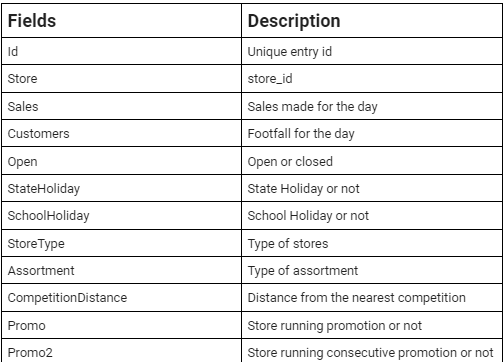

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
stores_df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
stores_df = stores_df[~stores_df['CompetitionDistance'].isnull()]

In [ ]:
#dropping unnecessary columns
stores_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1, inplace=True)
stores_df.head(5)

In [ ]:
#fillig null values
stores_df['Promo2SinceWeek'].fillna(0, inplace=True)
stores_df['Promo2SinceYear'].fillna(0, inplace=True)
stores_df['PromoInterval'].fillna('Never',inplace = True)

In [ ]:
stores_df.head(5)

In [ ]:
stores_df['PromoInterval'].unique()

In [ ]:
#changing datatype to datetime for date
stores_df['Date'] = stores_df['Date'].astype('datetime64[ns]')

In [ ]:
#making new column for further analysis
stores_df.head()
import datetime
stores_df['Year'] = pd.DatetimeIndex(stores_df['Date']).year
stores_df['Year'] = stores_df['Year'].astype(int)
stores_df['number_of_year_promotion_till_now'] = stores_df['Year'] - stores_df['Promo2SinceYear']
stores_df.head(5)

In [ ]:
stores_df['number_of_year_promotion_till_now'] = stores_df['number_of_year_promotion_till_now'].apply(lambda x: 0 if x>100 else x)

In [ ]:
stores_df.head()

In [ ]:
stores_df['month'] = stores_df['Date'].dt.month

stores_df.head()

In [ ]:
#unwanted column
stores_df.drop('Customers',axis = 1, inplace = True)

In [ ]:
#removing rows when stores were closed
stores_df = stores_df[~(stores_df['Open'] == 0)]

In [ ]:
stores_df.sort_values(by='Date',ascending = False).head(5)

In [ ]:
#stateholiday had different variable named a,b,c when there was a holiday so converting them to 1 that states that there was a holiday
stores_df['StateHoliday'] = stores_df['StateHoliday'].apply(lambda x: x if x==0 else 1)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8, 6))

plt.subplot(1,2,1)
plt.scatter(stores_df['Promo2'],stores_df['Sales'])

plt.subplot(1,2,2)
plt.scatter(stores_df['Promo'],stores_df['Sales'])


##### 1. Why did you pick the specific chart?

Shows relationship between 2 variable in better format

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
plt.boxplot(stores_df['CompetitionDistance'])

##### 1. Why did you pick the specific chart?

To check the distribution of the value in the column

##### 2. What is/are the insight(s) found from the chart?

Need to take care of outliers, because it has many values that are out of IQR that might affect the performance of the model

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.scatter(stores_df['number_of_year_promotion_till_now'],stores_df['Sales'])

##### 1. Why did you pick the specific chart?

good for showing relationship between variables

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
stores_df.groupby('StoreType')['Sales'].mean().plot(kind = 'bar')

##### 1. Why did you pick the specific chart?

best to check if categorical variable have any kind of relationship with the target variable

##### 2. What is/are the insight(s) found from the chart?

Store b has way much more sales compared to other stores

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
stores_df.groupby("DayOfWeek")["Sales"].mean()

In [ ]:
# Chart - 5 visualization code
sns.barplot(x = stores_df['DayOfWeek'],y = stores_df['Sales'])

##### 1. Why did you pick the specific chart?

Better for vizulaization of relationship between categorical and numeric value

##### 2. What is/are the insight(s) found from the chart?

Day of The week affect the sales, not linearly but they do

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
stores_df.head()
sns.scatterplot(x = stores_df['CompetitionDistance'], y = stores_df['Sales'])

##### 1. Why did you pick the specific chart?

Relationship between two variables

##### 2. What is/are the insight(s) found from the chart?

sales has some kind of relationship with competition distance,not linear but some kind of

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
stores_df['Year'].unique()

In [ ]:
# Chart - 7 visualization code
sns.barplot(x = stores_df['Year'], y = stores_df['Sales'])

In [ ]:
stores_df.columns

##### 2. What is/are the insight(s) found from the chart?

with each year, sales is increasing

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
stores_df.groupby('Assortment')['Sales'].mean().plot(kind = 'bar')

##### 2. What is/are the insight(s) found from the chart?

assortment is some what related to sales

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
stores_df.groupby('PromoInterval')['Sales'].mean().plot(kind='bar')

In [ ]:
ts_df =stores_df.sort_values(by='Date')
ts_df = ts_df.set_index("Date")
monthly = ts_df["Sales"].resample("M").mean()
plt.plot(monthly.index, monthly.values, marker="o", linewidth=2)
plt.figure(figsize=(12,12))




There tends to be seasonal pattern as sales tends to rise at the end of the year

In [ ]:
#feature creation for sample graph
t013_ = ts_df[ts_df['Year'] == 2013]
t014_ = ts_df[ts_df['Year'] == 2014]
t015_ = ts_df[ts_df['Year'] == 2015]

In [ ]:
t013_.groupby('month')['Sales'].mean().plot(kind='line')
t014_.groupby('month')['Sales'].mean().plot(kind='line')
t015_.groupby('month')['Sales'].mean().plot(kind='line')

Each year sales tend to be better than year before

#### Chart - 10 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

numeric_df = stores_df.select_dtypes(include=['int64', 'float64','int32'])

In [ ]:
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")

##### 1. Why did you pick the specific chart?

Check the relationship between all the numeric feature

#### Chart - 11 - Pair Plot

In [ ]:
# Pair Plot visualization code
cols = ['Sales','Promo','Promo2','month']
sns.pairplot(stores_df[cols])

##### 1. Why did you pick the specific chart?

Check the relationship between all the numeric feature with Sales

## ***5. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
stores_df.head()
stores_df['CompetitionDistance'].describe(percentiles=[0.25, 0.5, 0.75, 0.90])

In [ ]:
#replaced all the ouliers of competiiton with 16000 as after 16000, sales didn't got affect much by competition distance
stores_df['CompetitionDistance'] = stores_df['CompetitionDistance'].apply(lambda x: x if x < 16000 else 16000)

In [ ]:
stores_df.groupby(['Store','Assortment']).agg(mean_sales=('Sales', 'mean'),                     # mean of Sales
    min_competition_distance=('CompetitionDistance', 'min')).sort_values(by= 'min_competition_distance',ascending= False)

In [ ]:
stores_df.head()

### 3. Categorical Encoding

One hot encoding for DayOfWeek, Month and Store Type

and manual encoding for assortment, store type and year

In [ ]:
stores_df['Assortment'] = stores_df['Assortment'].astype(str).str.strip().str.lower()

In [ ]:
new_df = stores_df.copy()

In [ ]:
# Encode your categorical columns
new_df['Assortment'] = new_df['Assortment'].map({'a': 1,'b': 3,'c':2})

In [ ]:
new_df['StoreType'] = new_df['StoreType'].apply(lambda x: 1 if x == 'b' else 0)

In [ ]:
 # drops first category
df_dummies = pd.get_dummies(new_df['DayOfWeek'], prefix='DayOfWeek',drop_first=True)

In [ ]:
df = pd.concat([new_df, df_dummies], axis=1)

In [ ]:
df.head(5)

In [ ]:
df_dummies_2 = pd.get_dummies(new_df['month'], prefix='Month',drop_first=True)

In [ ]:
df = pd.concat([df,df_dummies_2],axis =1)

In [ ]:
df['Year'] = df['Year'].map({2013:0,2014:1,2015:2})

In [ ]:
df_dummies_3 = pd.get_dummies(df['Store'], prefix='Store',drop_first=True)

In [ ]:
df = pd.concat([df,df_dummies_3],axis =1)

In [ ]:
df.head(5)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
#cummulative sum feature for sample analysis, turns out there wasn't much impact with it
df['cumm_sum'] = df.sort_values(['Store', 'Date']).groupby('Store')['Sales'].cumsum()

#### 2. Feature Selection

In [ ]:
df.columns

In [ ]:
scale_df = df.copy()

In [ ]:
#dropped unnecessary columns
scale_df.drop(['Store','Promo2SinceYear','Promo2SinceWeek','PromoInterval','Open','SchoolHoliday','StateHoliday','DayOfWeek','number_of_year_promotion_till_now'], axis = 1, inplace= True)

In [ ]:
scale_df.columns

##### Which all features you found important and why?

Storetype showed relationship with sales, storetype b has more sales than others,
assortment showed relationship with sales,
Competition distance showed relationship with sales,
Year showed relationship with sales,



### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scale_df.head()

Scaling non-binary variables

In [ ]:
numeric_cols = ['CompetitionDistance','cumm_sum','Assortment','Year']
scaled_cols = ['scaled_CompetitionDistance','scaled_cumm_sum','scaled_assortment','scaled_year']

scale_df[scaled_cols] = scaler.fit_transform(scale_df[numeric_cols])


In [ ]:
final_df = scale_df.copy()

In [ ]:
final_df.columns

In [ ]:
final_df.drop(['CompetitionDistance','cumm_sum','Assortment','Year','month','scaled_cumm_sum'], axis = 1, inplace = True)

##### Which method have you used to scale you data and why?

### 8. Data Splitting

We need to predict the future value of the target variable('Sales'), so we can just go for random train and test split, so I have sorted the data by Date and then did the split on the database

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
final_df.sort_values(by='Date', inplace = True)

In [ ]:
final_df.drop(['Date'], axis = 1 , inplace = True)

In [ ]:
final_df['Sales'].describe()

In [ ]:
split = int(len(df) * 0.7)

train_df = final_df.iloc[:split]
test_df = final_df.iloc[split:]

In [ ]:
x_test = test_df.drop(['Sales'], axis = 1)
y_test = test_df['Sales']

In [ ]:
x_train = train_df.drop(['Sales'], axis = 1)
y_train = train_df['Sales']

##### What data splitting ratio have you used and why?

70:30 as it is better and standard split, also it will be better to split the 2015 data and predict the 2025 data with the help of previous data

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# ML Model - 1 Implementation
#fit the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)


In [ ]:
#predict mdoel
y_pred = model.predict(x_test)

In [ ]:
#check the error
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(mse)
print(r2)

In [ ]:
#visualize the predict and actual value
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual (y_test)")
plt.ylabel("Predicted (y_pred)")
plt.title("Actual vs Predicted")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used linear regression model, as i was able to see some linear relationship in the model and r2 for test data showed me accuracy of 76.5 that is pretty good for a model

#### 2. Cross- Validation & Hyperparameter Tuning

I tried to apply GridSearchCV, but it turns out that, dimension of my dataset is too huge for me, to run gridsearch on my pc or even TPU of google colab, i want to tried the polynomial features but turns out my computer doesn't have enough RAM. My guess is applying polynomial feature might increase the model accuracy

### ML Model - 2

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#model implementation and fit
model_2 = DecisionTreeRegressor(max_depth=100,         # controls tree depth
    min_samples_split=5,  # minimum samples to split a node
    random_state=42)
model_2.fit(x_train, y_train)

In [ ]:
#predict the y value of test
y_pred = model_2.predict(x_test)

In [ ]:
#predict the y value of train
y_train_pred = model_2.predict(x_train)

In [ ]:
#training data prediction
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")

In [ ]:
#prediction on test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.3f}")

In [ ]:
#visulaize the predict y and actual y for test dataset
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual (y_test)")
plt.ylabel("Predicted (y_pred)")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
#converting predicting value in a way that machine understands
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample new data (predict_data)
predict_data = pd.DataFrame({
    'Store': [600],
    'Promo': [1],
    'StoreType': ['a'],
    'Assortment': ['c'],
    'CompetitionDistance': [16000],
    'Promo2': [1],
    'Year': [2015],
    'month': [4],
    'DayOfWeek': [7],
    'cumm_sum': [5000]  # example cumulative sum or similar feature
})

# --- 1. Map categorical features ---
predict_data['Assortment'] = predict_data['Assortment'].map({'a': 1, 'b': 3, 'c': 2})
predict_data['StoreType'] = predict_data['StoreType'].apply(lambda x: 1 if x == 'b' else 0)
predict_data['Year'] = predict_data['Year'].map({2013: 0, 2014: 1, 2015: 2})

# --- 2. One-hot encode DayOfWeek, month, Store ---
df_dummies_day = pd.get_dummies(predict_data['DayOfWeek'], prefix='DayOfWeek', drop_first=True)
df_dummies_month = pd.get_dummies(predict_data['month'], prefix='Month', drop_first=True)
df_dummies_store = pd.get_dummies(predict_data['Store'], prefix='Store', drop_first=True)

predict_data = pd.concat([predict_data, df_dummies_day, df_dummies_month, df_dummies_store], axis=1)
predict_data.drop(columns=['DayOfWeek','month','Store'], inplace=True)

# --- 3. Scale numeric features using pre-fitted scaler ---
# Assume 'scaler' was fitted on training data
numeric_cols = ['CompetitionDistance','cumm_sum','Assortment','Year']
scaled_cols = ['scaled_CompetitionDistance','scaled_cumm_sum','scaled_assortment','scaled_year']

predict_data[scaled_cols] = scaler.transform(predict_data[numeric_cols])

# Drop original numeric columns if desired
predict_data.drop(columns=numeric_cols, inplace=True)
predict_data.drop(columns='scaled_cumm_sum', inplace=True)





In [ ]:
predict_data = predict_data.reindex(columns = x_train.columns,fill_value = 0)

In [ ]:
predict_data

In [ ]:
y_pred = model_2.predict(predict_data)

In [ ]:
print('Predict Sales for given data is: ', y_pred)

In [ ]:
stores_df[stores_df['Store'] == 600]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your trained Decision Tree model is named 'model'
# and your training features are in X_train

# Get feature importances
importances = model_2.feature_importances_

# Create a DataFrame for easier visualization
feat_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(feat_importances)

# Optional: plot the top 10 features
plt.figure(figsize=(10,6))
plt.barh(feat_importances['Feature'][:10][::-1], feat_importances['Importance'][:10][::-1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in Decision Tree')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model used here is DecisionTree Regressor, I was able to see that even though other variables has some linear relationship with sales, the dataset was much complex and there were some features who were related to the target variable but had some complex patterns, decision tree helps to predict the dataset with complex pattern. In my case, it did help r2 for my model turns out to be 80.3, that is pretty good for prediction

#### 2. Cross- Validation & Hyperparameter Tuning

It wasn't really possible for my CPU or TPU of google colab to run the GridSearchCV on this, as dimension of my dataset was wide, however i tried some random splits for max_depth and min_sample_split turns out 100 and 5 was the best fit out of them

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Decision Tree Regressor is the best choice out of two, given the resource I have. The r2 might increase with correct GridSearchCv or Polynomial featuring for linear regression. The r2 or decisiontree regressor is 80.3

# **Conclusion**

The project involved cleaning and preparing sales data for 1115 Rossmann stores and implementing predictive models. The Decision Tree Regressor outperformed Linear Regression, achieving an R² of 0.805 versus 0.765. This demonstrates the tree model’s ability to capture non-linear patterns in sales data. Due to hardware constraints, extensive hyperparameter tuning was limited, indicating room for further improvement. Future work includes adding polynomial features to linear regression and applying more efficient tuning methods. Overall, the project highlights effective modeling approaches for retail sales forecasting.